In [1]:
import cv2 as cv
from PIL import Image
import argparse
import os
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
inp = "./mteg5results/539_10.png"
inp = os.path.relpath("".join(inp))

In [3]:
#img_org = cv.imread(inp, cv.IMREAD_COLOR) #cv.VideoCapture(args.camera)
img_org = Image.open(inp)
img_org.load()
img_org = np.asarray( img_org, dtype='uint8' )
print(type(img_org))
#img_org = cv.cvtColor(img_org, cv.COLOR_BGR2RGB)
splited = np.vsplit(img_org,10) #TODO: auto parse of split number

<class 'numpy.ndarray'>


In [7]:
im_HSV = cv.cvtColor(img_org, cv.COLOR_BGR2HSV)
# full scale H
low_H, low_S, low_V = 0, 100, 100
high_H, high_S, high_V = 180, 255, 255
#
im_threshold = cv.inRange(im_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))
ret, binary = cv.threshold(im_threshold, 10, 255, cv.THRESH_BINARY)
#plt.imshow(cv.cvtColor(binary,cv.COLOR_BGR2RGB))
contours, hierarchy = cv.findContours(binary, cv.RETR_CCOMP,cv.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda x: cv.contourArea(x))
full_cnt = contours[0]
full_area = cv.contourArea(full_cnt)


full: 232.0, uncertain: 0.0
uncertainty: 0.0
full: 15308.5, uncertain: 0.0
uncertainty: 0.0
full: 19306.0, uncertain: 0.0
uncertainty: 0.0
full: 14211.0, uncertain: 0.0
uncertainty: 0.0
full: 15967.5, uncertain: 0.0
uncertainty: 0.0
full: 12526.0, uncertain: 0.0
uncertainty: 0.0
full: 345.5, uncertain: 0.0
uncertainty: 0.0
full: 12645.5, uncertain: 0.0
uncertainty: 0.0
full: 15055.0, uncertain: 0.0
uncertainty: 0.0
full: 11060.0, uncertain: 0.0
uncertainty: 0.0


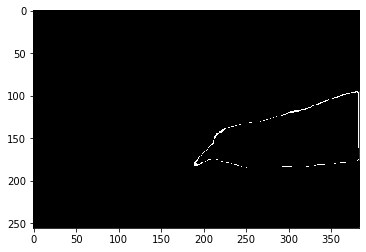

In [15]:
for i, sp in enumerate(splited):
    im_HSV = cv.cvtColor(sp, cv.COLOR_BGR2HSV)
    # full scale H
    low_H, low_S, low_V = 0, 100, 100
    high_H, high_S, high_V = 180, 255, 255
    #
    im_threshold = cv.inRange(im_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))
    ret, binary = cv.threshold(im_threshold, 10, 255, cv.THRESH_BINARY)
    #plt.imshow(cv.cvtColor(binary,cv.COLOR_BGR2RGB))
    contours, hierarchy = cv.findContours(binary, cv.RETR_CCOMP,cv.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda x: cv.contourArea(x))
    full_cnt = contours[0]
    full_area = cv.contourArea(full_cnt)
    
    # uncertainty
    ow_H, low_S, low_V = 0, 100, 100
    high_H, high_S, high_V = 180, 255, 245
    im_threshold = cv.inRange(im_HSV, (low_H, low_S, low_V), (high_H, high_S, high_V))
    ret, binary = cv.threshold(im_threshold, 10, 255, cv.THRESH_BINARY)
    # shrink image
    kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))
    binary = cv.erode(binary, kernel, anchor=(0, 0), iterations=1)
    plt.imshow(cv.cvtColor(binary,cv.COLOR_BGR2RGB))
    contours, hierarchy = cv.findContours(binary, cv.RETR_CCOMP,cv.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=lambda x: cv.contourArea(x))
    cnt = contours[0]
    uncertain_area = cv.contourArea(cnt)
    print("full: {}, uncertain: {}".format(full_area, uncertain_area))
    if full_area > 0.0:
        print("uncertainty: {}".format(uncertain_area/full_area))